<a href="https://colab.research.google.com/github/Rahe23/Assessment-Two/blob/main/Business_Report_Assessment_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
Energy is used in many forms in every sphere of our life. Studying the use of energy is very important to understand how much and what is consumed. Some Energy resources are scarce. In the provided the dataset, there are different sources of energy such as Coal, Gas, Oil and Renewable Energy. The usage of these sources by states and people of those states over the timespan of 2008 to 2021 has been provided. We have been asked to solve some problems based on this dataset.


# Problem Solving Methodology

1.   Problem Statement
2.   Feature Analysis
3.   Develop an Algorithm
4.   Convert Algorithm in to Python Code
5.   Test Different Solutions

## Step-1: Problem Statement

This report aims to uncover various insights on Australian Energy Consumtions. This is an academic assignment where we have been provided some scenarios and we were asked to solve them. This report aims to show our understanding and how we use different techniques by following industry best practices.

##  Step-2: Feature Analysis





### Database: Aus_energy dataset as SQLite database.

#### Data Schema: Cleansing has been performed.



*   Year: Represents the fiscal year for which the data is recorded. In this case, all entries are from the fiscal year 2008-09.

*   State:The Australian state for which the data is recorded. Examples include Western Australia (WA), New South Wales (NSW), Victoria (VIC), Queensland (QLD), and South Australia (SA).

* Coal (PJ):The amount of energy consumed from coal, measured in petajoules (PJ).

* Oil (PJ): The amount of energy consumed from oil, measured in petajoules (PJ).

* Gas (PJ):The amount of energy consumed from gas, measured in petajoules (PJ).

* Renewables (PJ):The amount of energy consumed from renewable energy sources, measured in petajoules (PJ)

* Population:The population of the state during the fiscal year.

* GSP ($ million):The Gross State Product (GSP) in million dollars, representing the economic output of the state.






## Step-3: Develop an Algorithm

1. Upload the 'Aus_energy_sqlite3.db' file.
2. Import the necessary libraries (sqlite3, pandas, matplotlib.pyplot).
3. Create a connection to the SQLite database.
4. Load the 'Aus_energy_sqlite3.db' table into a Pandas DataFrame.
5. Perform data exploration, which includes displaying an overview of the table, the first and last 05 rows, and general information.
6. Check for duplicates and missing values, and handle them if necessary.
7. Explore the data: Examine each column and visualize its distribution to identify inappropriate data.
8. Remove inappropriate or meaningless data.
9. Plot the graph and its descriptive statistics information again to verify that the data has been successfully cleaned.
10. Data Analysis by Questions
    
    Group A:

    Q1: Compute and visualize the total energy consumption for each state.
    
    Q2: Compute and visualize the total energy consumption by fuel type.
    
    Q3: Analyse and plot the total energy consumption fuel types for each year.
    
    Q4: Analyse and visualize the total energy consumption for each state for each year.
    
    Group B:
    Q5. Analyse and visualise the total energy consumption for each state, broken down by fuel type.

    Q6. Analyse the per capita energy consumption for each state for each year and create a corresponding visualization.

    Group C:

    Q8. Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures.

11. Interpret and summarise the findings






##  Step-4: Convert Algorithm in to Python Code

Refer to the Code Development Notebook. Best codes are provided in this business report notebook as well.

## Step-5: Test Different Solutions

Refer to the Code Development Notebook Best codes are provided in this business report notebook as well.

# Data Analysis Report

### Import Libraries

In [ ]:
# Importing necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Load  Data Set

In [ ]:
def load_data_from_sqlite(db_path, table_name):

    # Connect to the SQLite database
    connection = sqlite3.connect(db_path)
    cur = connection.cursor()

    # Print table names
    cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
    print("Tables in the database:", cur.fetchall())

    # Print table schema
    cur.execute(f"PRAGMA table_info('{table_name}');")
    print(f"Schema of the '{table_name}' table:", cur.fetchall())

    # Load the data into a DataFrame
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, connection)

    # Close the connection
    connection.close()

    return df


In [ ]:
# load dataset
db_path = '/content/AUS_energy_sqlite3.db'
table_name = 'AUS_energy'
asus_engy_df = load_data_from_sqlite(db_path, table_name)


Tables in the database: [('AUS_energy',)]
Schema of the 'AUS_energy' table: [(0, 'Year', 'TEXT', 0, None, 0), (1, 'State', 'TEXT', 0, None, 0), (2, 'Coal (PJ)', 'REAL', 0, None, 0), (3, 'Oil (PJ)', 'REAL', 0, None, 0), (4, 'Gas (PJ)', 'REAL', 0, None, 0), (5, 'Renewables (PJ)', 'REAL', 0, None, 0), (6, 'Population', 'INTEGER', 0, None, 0), (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]


### Display Data

In [ ]:
# Display the first few rows of the DataFrame
asus_engy_df.head(5)

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174


###  Display Data Type

In [ ]:
asus_engy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


#### The dataset provides information with the following columns: Year (object): The year of the data record, stored as a string. State (object): The state for which the data is recorded, stored as a string. Coal (PJ) (object): The energy consumption from coal, stored as a string. Oil (PJ) (float64): The energy consumption from oil, stored as a floating-point number. Gas (PJ) (float64): The energy consumption from gas, stored as a floating-point number. Renewables (PJ) (float64): The energy consumption from renewable sources, stored as a floating-point number. Population (int64): The population of the state, stored as an integer. GSP ($ million) (int64): The Gross State Product in million dollars, stored as an integer.

In [ ]:
# Summary statistics of numerical columns
asus_engy_df.describe()

,Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
count,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


### Interpretation:
1.  Oil (PJ): The average oil consumption is 317.65 PJ, with a standard deviation of 229.32 PJ, indicating significant variability. The minimum consumption is 33.4 PJ, and the maximum is 687.4 PJ.
2. Gas (PJ): The average gas consumption is 204.59 PJ, with a standard deviation of 179.21 PJ. The minimum is 6.6 PJ, and the maximum is 692.6 PJ, showing a wide range.  


3.   Renewables (PJ): The average consumption from renewables is 51.58 PJ, with a standard deviation of 38.38 PJ. The minimum is 0.4 PJ, and the maximum is 143.0 PJ.
4.   Population: The average population across the dataset is about 3.42 million, with a wide range (from 226,027 to 8,622,575), indicating a diverse set of states or regions.
5. GSP ( million): The average Gross State Product is $266,337 million, with substantial variability (standard deviation of 209,376.49 million).The minimum GSP is 19,469 million, and the maximum is 706,003 million.

These summary statistics provide an overview of the distribution and variability of energy consumption, population, and GSP across the dataset. High standard deviations relative to the means suggest significant differences in energy consumption, population sizes, and economic output across the states or regions included in the dataset.

### Check Data Set Missing Value

In [ ]:
# Check for null values
print("Null values in the dataset:")
print(asus_engy_df.isnull().sum())

Null values in the dataset:
Year               0
State              0
Coal (PJ)          0
Oil (PJ)           0
Gas (PJ)           0
Renewables (PJ)    0
Population         0
GSP ($ million)    0
dtype: int64


#### The dataset contains no Missing  values, as indicated by all entries in the series being False. This means each row in the dataset is unique.

### Check Data Set Class Distribution

In [ ]:
# Calculate the count of superheroes by gender
state_counts = asus_engy_df['State'].value_counts()

state_counts

State
WA     14
NSW    14
VIC    14
QLD    14
SA     14
TAS    14
NT     14
Name: count, dtype: int64

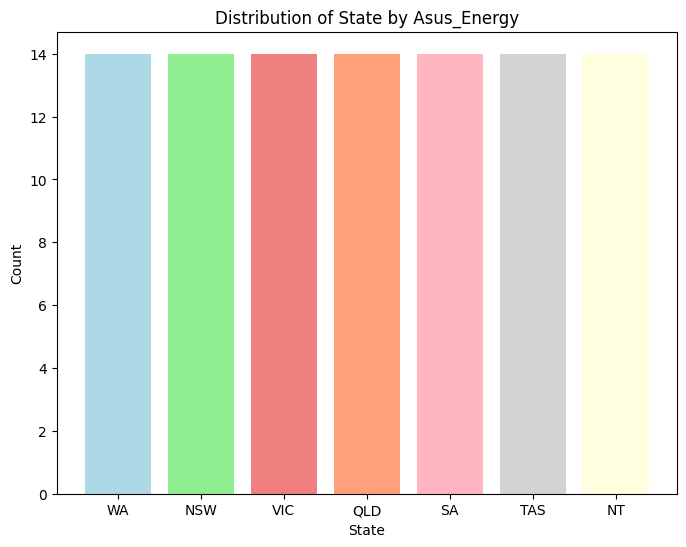

In [ ]:
# Calculate the count of superheroes by gender
state_counts = asus_engy_df['State'].value_counts()

state_counts
# Define a list of different colors for each bar
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightgray', 'lightyellow']

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
plt.bar(state_counts.index, state_counts.values, color=colors)
plt.title('Distribution of State by Asus_Energy')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()

#### The bar chart visualizes the distribution of states within the Asus_Energy dataset. Each bar represents a different state with a unique color, making it easy to distinguish between them. The chart shows that each state—WA, NSW, VIC, QLD, SA, TAS, and NT—has an equal count of 14 entries in the dataset. This even distribution suggests that the dataset is balanced in terms of the representation of each state. The use of different colors enhances the visual appeal and helps in quickly identifying the states.

## Group-A Q1: Compute and visualize the total energy consumption for each state.





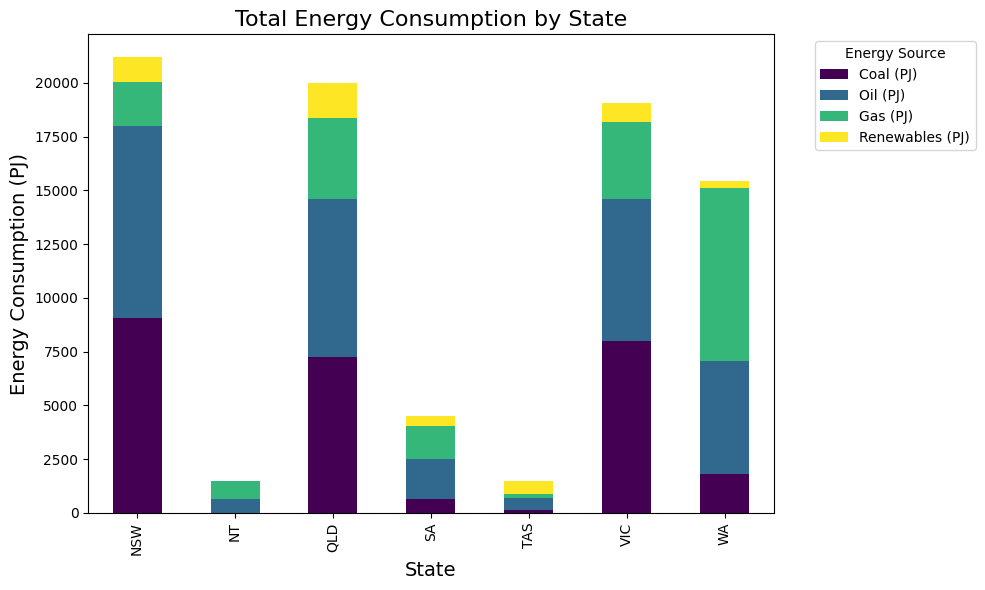

In [ ]:
# Convert the 'Coal (PJ)' column to numeric
asus_engy_df['Coal (PJ)'] = pd.to_numeric(asus_engy_df['Coal (PJ)'], errors='coerce')

# Function to visualize total energy consumption by state
def visualize_total_energy_by_state(df):
    """Visualize the total energy consumption for each state."""
    energy_columns = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']

    # Ensure all energy columns are numeric
    for column in energy_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    total_energy_state = df.groupby('State')[energy_columns].sum()

    ax = total_energy_state.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    ax.set_title('Total Energy Consumption by State', fontsize=16)
    ax.set_xlabel('State', fontsize=14)
    ax.set_ylabel('Energy Consumption (PJ)', fontsize=14)
    ax.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Visualize total energy consumption by state
visualize_total_energy_by_state(asus_engy_df)

### Overview:
The bar chart visualizes the total energy consumption for each Australian state, broken down by fuel type: Coal (PJ), Oil (PJ), Gas (PJ), and Renewables (PJ). The data highlights the energy consumption patterns for different states, providing insights into the predominant energy sources.



### Insights:
New South Wales (NSW) has the highest total energy consumption, exceeding 20,000 PJ, with coal being the dominant energy source, contributing over 7,500 PJ. Northern Territory (NT) has the lowest total consumption at around 2,000 PJ, relying mostly on oil and gas with negligible use of coal and renewables. Queensland (QLD) has a total energy consumption of approximately 20,000 PJ, with significant use of coal and oil, and notable contributions from gas and renewables. South Australia (SA) consumes around 4,000 PJ, with a balanced distribution between coal, oil, gas, and renewables, but overall lower consumption. Tasmania (TAS) has a total energy consumption of less than 2,000 PJ, with higher reliance on renewables compared to other states. Victoria (VIC) has a total consumption of over 15,000 PJ, with significant use of coal and oil, and moderate contributions from gas and renewables. Western Australia (WA) consumes around 15,000 PJ, predominantly using oil and gas, with moderate use of coal and renewables.

The visualization reveals that NSW, QLD, VIC, and WA are the highest energy-consuming states, primarily relying on coal and oil. In contrast, NT and TAS have the lowest total energy consumption, with TAS showing a higher reliance on renewables. The data highlights the varied energy consumption patterns across Australian states and underscores the dependence on fossil fuels, particularly coal and oil.

## Group-A Q2: Compute and visualize the total energy consumption by fuel type.

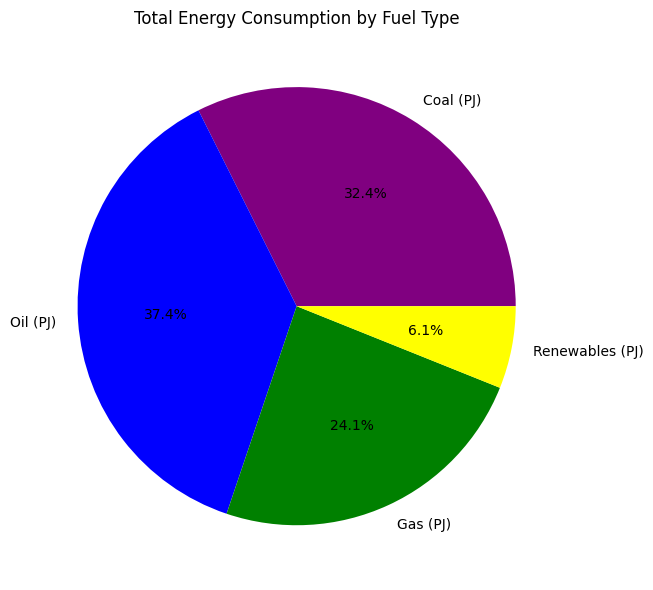

In [ ]:
# Function to visualize total energy consumption by fuel type
def visualize_total_energy_by_fuel_type(df):
    """Visualize the total energy consumption by fuel type."""
    # Ensure the columns are of numeric type
    df['Coal (PJ)'] = pd.to_numeric(df['Coal (PJ)'], errors='coerce')
    df['Oil (PJ)'] = pd.to_numeric(df['Oil (PJ)'], errors='coerce')
    df['Gas (PJ)'] = pd.to_numeric(df['Gas (PJ)'], errors='coerce')
    df['Renewables (PJ)'] = pd.to_numeric(df['Renewables (PJ)'], errors='coerce')

    # Sum the total energy consumption by fuel type
    total_energy_fuel = df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()

    # Pie chart for total energy consumption by fuel type
    plt.figure(figsize=(8, 6))
    total_energy_fuel.plot(kind='pie', autopct='%1.1f%%', colors=['purple', 'blue', 'green', 'yellow'])
    plt.title('Total Energy Consumption by Fuel Type')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# Assuming 'asus_engy_df' is the DataFrame containing the data
visualize_total_energy_by_fuel_type(asus_engy_df)

### Overview:
The pie chart displays the total energy consumption in Australia by fuel type, breaking down the contributions of Coal (PJ), Oil (PJ), Gas (PJ), and Renewables (PJ) to the overall energy consumption. This visual representation helps to understand the relative share of each fuel type in the total energy mix.




### Insights:

Oil emerges as the dominant energy source, accounting for 37.4% of the total energy consumption. Coal follows closely, contributing 32.4% to the energy mix. Gas represents 24.1% of the total energy consumption, indicating its significant role in the energy landscape. Renewables, although increasingly important, currently constitute the smallest share at 6.1%. This distribution highlights a heavy reliance on fossil fuels (oil, coal, and gas) in Australia's energy consumption, with a relatively smaller but growing share of renewable energy sources. The insights from this pie chart underscore the importance of transitioning towards more sustainable energy sources to reduce dependency on fossil fuels.

## Group-A Q3: Analyse and plot the total energy consumption fuel types for each year.


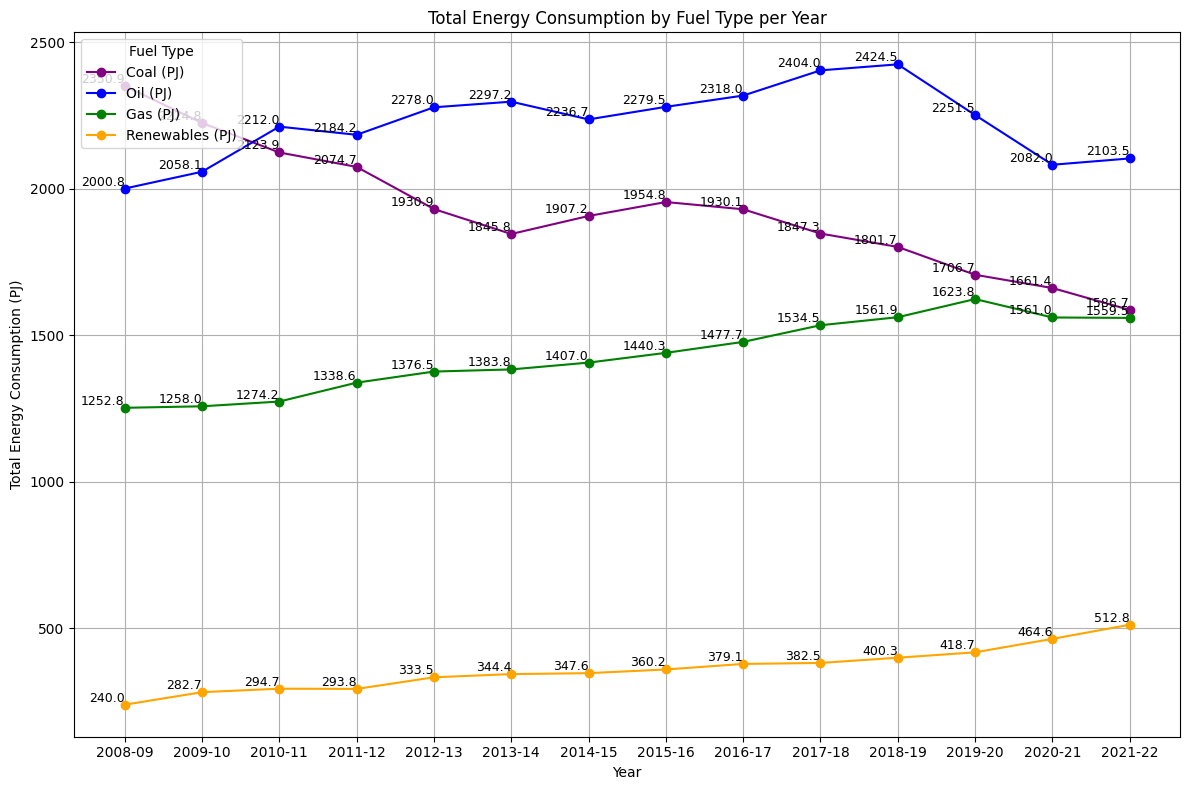

In [ ]:
# Function to analyze and plot total energy consumption by fuel types for each year
def visualize_energy_by_fuel_type_per_year(df):
    """Analyze and plot total energy consumption by fuel types for each year."""
    # Ensure the columns are of numeric type
    df['Coal (PJ)'] = pd.to_numeric(df['Coal (PJ)'], errors='coerce')
    df['Oil (PJ)'] = pd.to_numeric(df['Oil (PJ)'], errors='coerce')
    df['Gas (PJ)'] = pd.to_numeric(df['Gas (PJ)'], errors='coerce')
    df['Renewables (PJ)'] = pd.to_numeric(df['Renewables (PJ)'], errors='coerce')

    # Group by year and sum the energy consumption by fuel type
    energy_per_year = df.groupby('Year')[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()

    # Define custom colors for each line
    colors = ['purple', 'blue', 'green', 'orange']

    # Plot the data as a line chart
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(energy_per_year.columns):
        plt.plot(energy_per_year.index, energy_per_year[column], marker='o', color=colors[i], label=column)
        # Add value labels to each point
        for x, y in zip(energy_per_year.index, energy_per_year[column]):
            plt.text(x, y, f'{y:.1f}', fontsize=9, ha='right', va='bottom')

    plt.title('Total Energy Consumption by Fuel Type per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Energy Consumption (PJ)')
    plt.legend(title='Fuel Type', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming 'asus_engy_df' is the DataFrame containing the data
visualize_energy_by_fuel_type_per_year(asus_engy_df)

### Overview:
The line chart shows the total energy consumption in Australia by fuel type (Coal, Oil, Gas, and Renewables) for each year from 2008-09 to 2021-22. Each line represents a different fuel type, and the values are annotated to highlight the consumption in petajoules (PJ) for each year.





### Insights:

Oil consumption remained the highest among the fuel types, peaking at 2424.5 PJ in 2017-18 and showing a slight decline to 2103.5 PJ in 2021-22. Coal consumption has decreased significantly from 2000.8 PJ in 2008-09 to 1596.7 PJ in 2021-22. Gas consumption has steadily increased from 1252.8 PJ in 2008-09 to 1567.1 PJ in 2021-22, highlighting its growing role. Renewable energy consumption, though the smallest share, has shown continuous growth, rising from 240.0 PJ in 2008-09 to 512.8 PJ in 2021-22. This trend reflects a shift towards more sustainable energy sources, despite the continued dominance of fossil fuels.

## Group-A Q4: Analyse and visualize the total energy consumption for each state for each year.

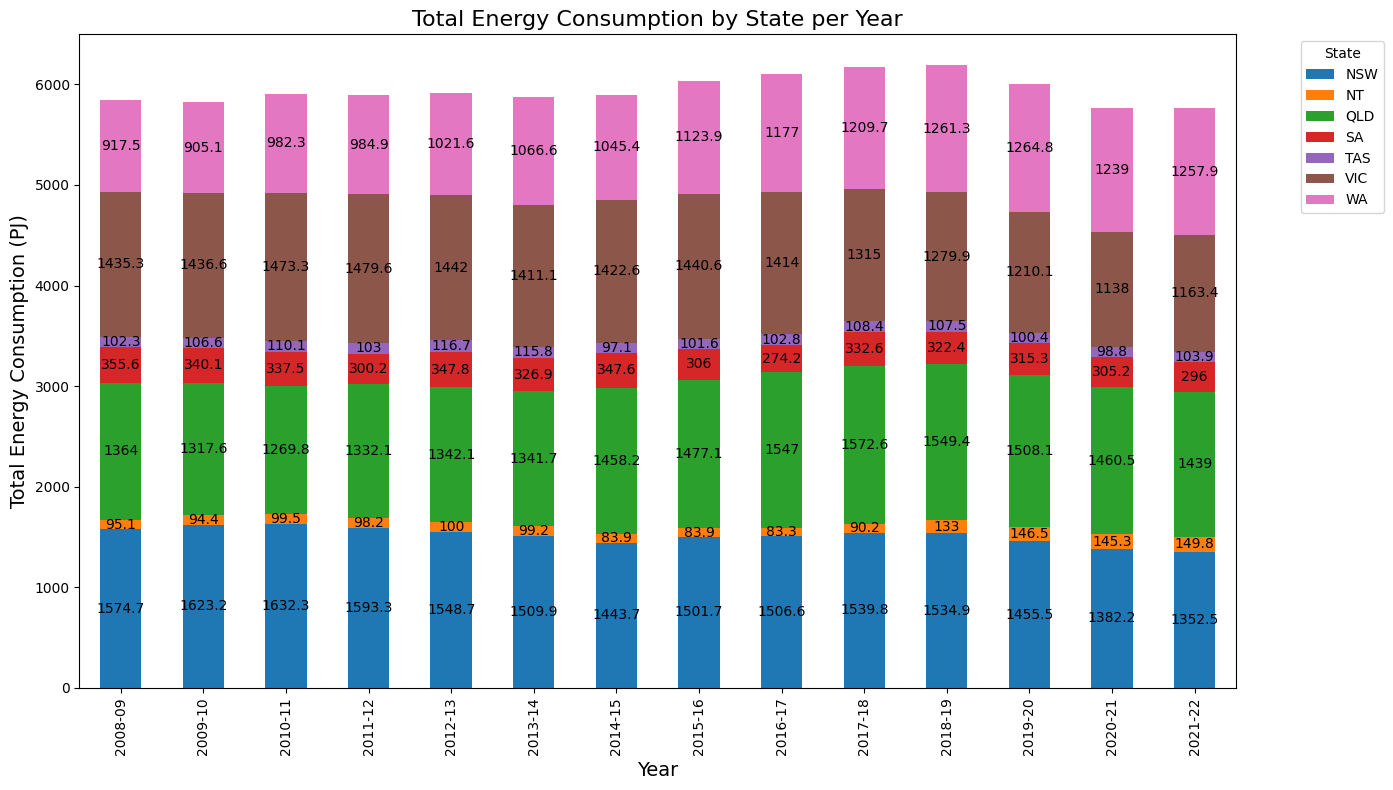

In [ ]:
# Calculate the total energy consumption
asus_engy_df['Total Energy (PJ)'] = asus_engy_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum(axis=1)

# Group by year and state, then sum the total energy consumption
energy_per_year_state = asus_engy_df.groupby(['Year', 'State'])['Total Energy (PJ)'].sum().unstack()


# Plot the data as a stacked bar chart
ax = energy_per_year_state.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Energy Consumption by State per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Energy Consumption (PJ)', fontsize=14)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add values on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

### Overview:
The stacked bar chart illustrates the total energy consumption for each state in Australia from 2008-09 to 2021-22. The chart displays the annual energy consumption in petajoules (PJ) for NSW, NT, QLD, SA, TAS, VIC, and WA.




### Insights:
The data shows a relatively consistent pattern of energy consumption over the years, with NSW consistently consuming the most energy, reaching a peak of 1623.2 PJ in 2009-10. WA follows with substantial consumption, peaking at 1264.8 PJ in 2020-21. VIC and QLD also show significant energy use, peaking at 1479.6 PJ and 1547 PJ respectively. Smaller states like NT, TAS, and SA have lower total energy consumption, with TAS showing the least, peaking at 102.3 PJ in 2008-09. Notably, while the total consumption appears relatively stable, some fluctuations are visible in individual states, reflecting varying energy demands and possibly shifts in energy policy or economic activity.

## Group-B Q5: Analyse and visualise the total energy consumption for each state, broken down by fuel type.

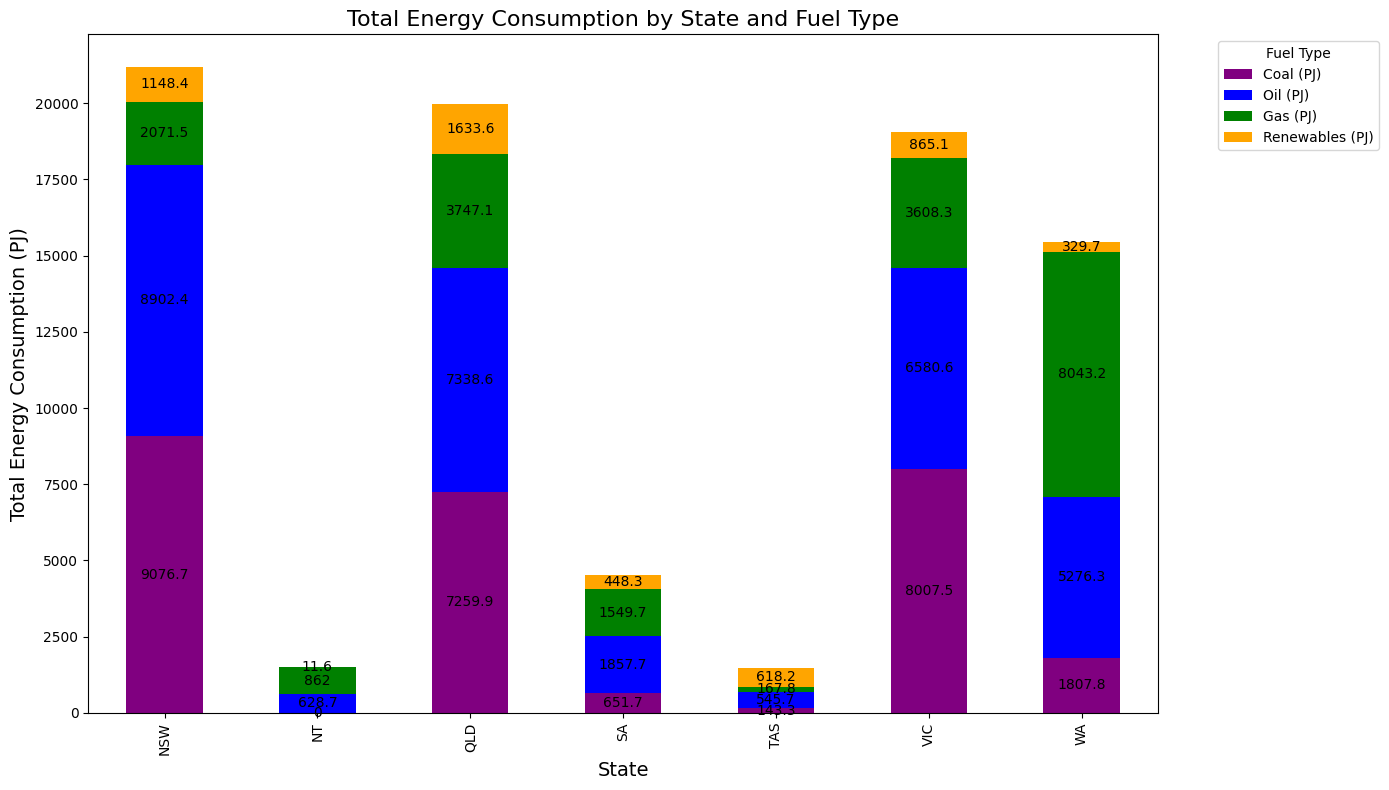

In [ ]:
# Calculate the total energy consumption
asus_engy_df['Total Energy (PJ)'] = asus_engy_df[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum(axis=1)

# Group by state and sum the energy consumption for each fuel type
energy_per_state = asus_engy_df.groupby('State')[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']].sum()

# Plot the data as a stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
energy_per_state.plot(kind='bar', stacked=True, ax=ax, color=['purple', 'blue', 'green', 'orange'])
plt.title('Total Energy Consumption by State and Fuel Type', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Energy Consumption (PJ)', fontsize=14)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding value labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

### Overview:
The stacked bar chart shows the total energy consumption for each Australian state, broken down by fuel type: coal, oil, gas, and renewables. This visualization provides a comprehensive view of how each state utilizes different energy sources.



### Insights:
NSW is the largest consumer of energy, with a total consumption of over 20,000 PJ, primarily driven by oil (8902.4 PJ) and coal (9076.7 PJ). QLD follows with a significant total consumption of 19,357.4 PJ, with major contributions from coal (7259.9 PJ) and oil (7338.6 PJ). VIC consumes 18,187.2 PJ, with a notable reliance on oil (6580.6 PJ) and coal (8007.5 PJ). WA shows a total energy consumption of 17,480.8 PJ, predominantly from gas (8043.2 PJ) and oil (5276.3 PJ). SA, TAS, and NT have lower total energy consumption, with SA consuming 4507.4 PJ, TAS 1678.8 PJ, and NT 1503.3 PJ. Gas and renewables play a more significant role in these smaller states compared to larger states. This distribution highlights the varying energy profiles across states, with larger states relying heavily on coal and oil, while smaller states show a more diverse energy mix.